In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

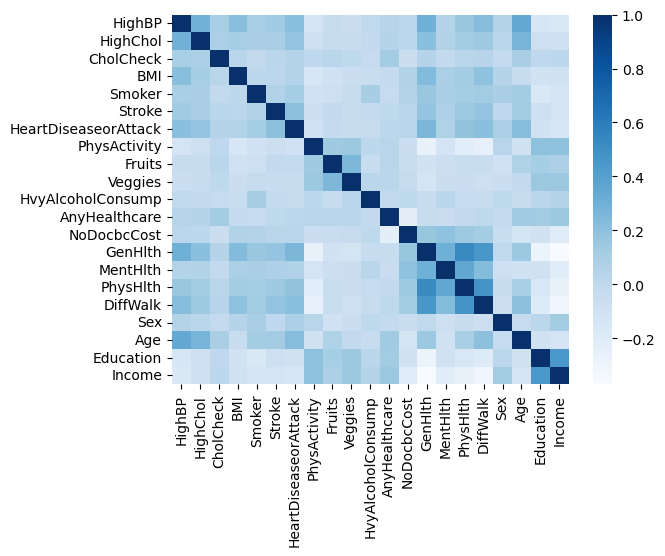

In [13]:
df=pd.read_csv("./diabetes_012_health_indicators_BRFSS2015.csv")

sns.heatmap(df.iloc[:,1:].corr(),cmap="Blues",annot=False)

In [15]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
# offline,online=train_test_split(df,test_size=0.2,stratify=df["Diabetes_012"])

# offline.to_csv("./offline.csv",index=False)
# online.to_csv("./online.csv",index=False)

In [3]:
df=pd.read_csv("./offline.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
1,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,5.0,1.0,0.0,11.0,6.0,8.0
2,2.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,4.0,0.0,30.0,1.0,1.0,13.0,5.0,8.0
3,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,5.0,7.0
4,2.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,4.0,7.0,1.0,0.0,0.0,9.0,4.0,8.0


In [4]:
#Preprocessing
df["Diabetes_012"]=df["Diabetes_012"].astype(int)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,stratify=df["Diabetes_012"])

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score
f1_scorer=make_scorer(f1_score,average='micro')

In [17]:
#Model 1
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2'],
    'max_leaf_nodes': [ 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5,scoring=f1_scorer,n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [11]:
#Model 2
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [3, 5],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt','log2'],
    'max_leaf_nodes': [10],
    'min_impurity_decrease': [0.0],
    'oob_score': [True],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring=f1_scorer,n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params

{'class_weight': 'balanced',
 'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'oob_score': True}

In [16]:
#Model 3

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100,200],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'objective': [ 'multi:softmax'],
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring=f1_scorer)

# Fit the model to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'objective': 'multi:softmax',
 'reg_alpha': 0.5,
 'reg_lambda': 2,
 'subsample': 0.8}

In [20]:
dt_best_params={'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}
rf_best_params={'class_weight': 'balanced',
 'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'oob_score': True}
xgb_best_params={'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'objective': 'multi:softmax',
 'reg_alpha': 0.5,
 'reg_lambda': 2,
 'subsample': 0.8}
decision_tree_model=DecisionTreeClassifier(**dt_best_params)
random_forest_model=RandomForestClassifier(**rf_best_params)
xgboost_model=XGBClassifier(**xgb_best_params)


In [21]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(decision_tree_model, X_train, Y_train, cv=5, scoring=f1_scorer)
rf_scores = cross_val_score(random_forest_model, X_train, Y_train, cv=5, scoring=f1_scorer)
xgb_scores = cross_val_score(xgboost_model, X_train, Y_train, cv=5, scoring=f1_scorer)

In [29]:
print("Decision Tree Classifier CV score:",dt_scores.mean())
print("Random Forest Classifier CV score:",rf_scores.mean())
print("XGB Classifier CV score:",xgb_scores.mean())

Decision Tree Classifier CV score: 0.677583074127683
Random Forest Classifier CV score: 0.6675495057127898
XGB Classifier CV score: 0.843872994364202


In [24]:
decision_tree_model.fit(X_train,Y_train)
random_forest_model.fit(X_train,Y_train)
xgboost_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [25]:
decision_tree_predictions=decision_tree_model.predict(X_test)
random_forest_predictions=random_forest_model.predict(X_test)
xgboost_predictions=xgboost_model.predict(X_test)

In [35]:
print("Decison Tree Model:","\tF1=",f1_score(Y_test,decision_tree_predictions,average="weighted"),"Accuracy=",accuracy_score(Y_test,decision_tree_predictions))
print("Random Forest Model:","\tF1=",f1_score(Y_test,random_forest_predictions,average="weighted"),"\tAccuracy=",accuracy_score(Y_test,random_forest_predictions))
print("XGBoost Model:","\t\tF1=",f1_score(Y_test,xgboost_predictions,average="weighted"),"\tAccuracy=",accuracy_score(Y_test,xgboost_predictions))

Decison Tree Model: 	F1= 0.034074655208584166 Accuracy= 0.13932346202173002
Random Forest Model: 	F1= 0.7245275101222691 	Accuracy= 0.6645396536007293
XGBoost Model: 		F1= 0.776867997272367 	Accuracy= 0.8440710537337702


In [37]:
import joblib
joblib.dump(xgboost_model, 'diabetes_prediction_model.pkl')

['diabetes_prediction_model.pkl']